<a href="https://colab.research.google.com/github/cowboy779/202509_DataAnalysis/blob/main/2025_%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%EA%B3%BC%EC%A0%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests
import json
import pandas as pd

api_key = '4b64654441636f773133324d55745443'
base_url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5"

## 데이터 수집
# response = requests.get(url)
# data = response.json()
# print(json.dumps(data, indent=4, ensure_ascii=False))

result = []

for year in range(2015, 2025):
    for month in range(1, 13):
        ym = f"{year}/{month:02d}"
        url = f"{base_url}/{ym}"

        response = requests.get(url)
        data = response.json()

        try:
            rows = data['energyUseDataSummaryInfo']['row']
            for r in rows:
                if r.get('MM_TYPE') == '개인':
                    filtered = {
                        "YEAR": r.get("YEAR"),
                        "MON": r.get("MON"),
                        "EUS": r.get("EUS"),
                        "GUS": r.get("GUS"),
                        "WUS": r.get("WUS"),
                        "HUS": r.get("HUS")
                    }
                    result.append(filtered)
        except KeyError:
            pass

with open("energy_use_personal_2015_2024.json", "w", encoding="utf-8") as f:
    json.dump(result, f, ensure_ascii=False, indent=4)



   YEAR MON        EUS       GUS           WUS           HUS
0  2015  01  193784708  59133720  12819757.886  22740838.937
1  2015  02  189974230  56487358  12656888.218  18793320.213
2  2015  05  177289769  22060892  13086734.214   1320895.801
3  2015  06  186073153  12677645  14241651.402    294312.634
4  2015  07  165114568   8893640  12083879.038    702863.645
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YEAR    83 non-null     object
 1   MON     83 non-null     object
 2   EUS     83 non-null     object
 3   GUS     83 non-null     object
 4   WUS     83 non-null     object
 5   HUS     83 non-null     object
dtypes: object(6)
memory usage: 4.0+ KB
None
        YEAR MON        EUS       GUS           WUS           HUS
count     83  83         83        83            83            83
unique    10  12         83        83            83            83
t

In [17]:
import json
import pandas as pd

with open("energy_use_personal_2015_2024.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YEAR    83 non-null     object
 1   MON     83 non-null     object
 2   EUS     83 non-null     object
 3   GUS     83 non-null     object
 4   WUS     83 non-null     object
 5   HUS     83 non-null     object
dtypes: object(6)
memory usage: 4.0+ KB
None
        YEAR MON        EUS       GUS           WUS           HUS
count     83  83         83        83            83            83
unique    10  12         83        83            83            83
top     2024  11  193784708  59133720  12819757.886  22740838.937
freq      12   9          1         1             1             1


In [32]:
import json
import pandas as pd

with open("energy_use_personal_2015_2024.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

df["YEAR"] = df["YEAR"].astype(int)
df["MON"]  = df["MON"].astype(int)

for c in ["EUS","GUS","WUS","HUS"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

def season(m):
    if 3 <= m <= 5:   return "봄"
    if 6 <= m <= 8:   return "여름"
    if 9 <= m <= 11:  return "가을"
    return "겨울"

df["SEASON"] = df["MON"].apply(season)

df = df[(df["YEAR"] >= 2015) & (df["YEAR"] <= 2024)]

out = df.groupby(["YEAR","SEASON"])[["EUS","GUS","WUS","HUS"]].sum().reset_index()

print("\n=== 연도별·계절별 합계 ===")
print(out)



=== 연도별·계절별 합계 ===
    YEAR SEASON         EUS           GUS           WUS           HUS
0   2015     가을   186473958  8.924018e+06  1.471183e+07  3.167520e+06
1   2015     겨울   587147080  1.557163e+08  3.938081e+07  6.263678e+07
2   2015      봄   177289769  2.206089e+07  1.308673e+07  1.320896e+06
3   2015     여름   593188200  2.919030e+07  4.149008e+07  1.457465e+06
4   2016     가을   644316084  4.107559e+07  3.762210e+07  1.560500e+07
5   2016     겨울   432008284  1.265215e+08  2.653103e+07  4.863916e+07
6   2016      봄   601441726  1.234673e+08  4.070317e+07  1.979349e+07
7   2016     여름   205061790  1.334493e+07  1.454346e+07  3.406011e+05
8   2017     가을   650186124  4.693333e+07  4.092243e+07  1.574849e+07
9   2017     겨울   449162431  1.353193e+08  2.780120e+07  3.830105e+07
10  2017      봄   418281542  8.940016e+07  2.654828e+07  3.128769e+07
11  2017     여름   297850172  8.429188e+06  1.429183e+07  1.189270e+05
12  2018     가을   227294230  3.123951e+07  1.370669e+07  1.027629e+07


/tmp/ipython-input-1589253770.py:41: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1589253770.py:41: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1589253770.py:41: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1589253770.py:41: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1589253770.py:41: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1589253770.py:41: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1589253770.py:41: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_lay

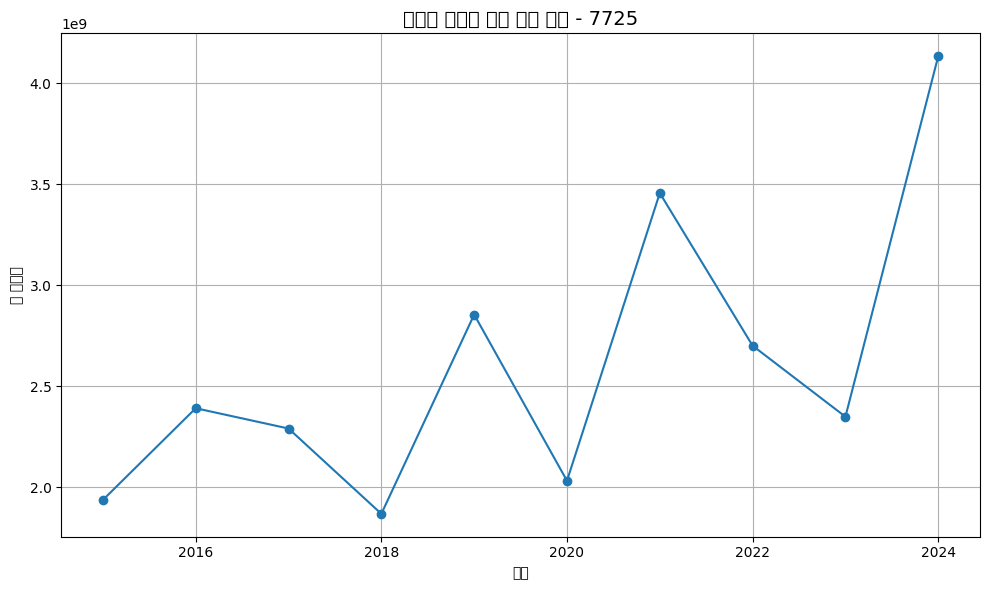

In [37]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Noto Sans CJK KR'
mpl.rcParams['axes.unicode_minus'] = False

with open("energy_use_personal_2015_2024.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

df["YEAR"] = df["YEAR"].astype(int)
df["MON"]  = df["MON"].astype(int)

for c in ["EUS","GUS","WUS","HUS"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

def season(m):
    if 3 <= m <= 5:   return "봄"
    if 6 <= m <= 8:   return "여름"
    if 9 <= m <= 11:  return "가을"
    return "겨울"

df["SEASON"] = df["MON"].apply(season)

df = df[(df["YEAR"] >= 2015) & (df["YEAR"] <= 2024)]

yearly = df.groupby("YEAR")[["EUS","GUS","WUS","HUS"]].sum()
yearly["TOTAL"] = yearly.sum(axis=1)

# 6) 시각화
plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly["TOTAL"], marker="o", linestyle="-")

plt.title("연도별 에너지 사용 총액 변화 - 7725", fontsize=14)
plt.xlabel("연도")
plt.ylabel("총 사용량")
plt.grid(True)
plt.tight_layout()
plt.show()